In [1]:
from dl import authClient as ac, queryClient as qc, storeClient as sc, helpers
import pylab as plt
import numpy as np

In [2]:
token=ac.login('mgkadrmas')

In [10]:
def LMCParallax (ra,dec,radius):
    #take query
    res=qc.query(token,sql='select * from gaia_dr2.gaia_source where q3c_radial_query(ra,dec,'+str(ra)+','+str(dec)+','+str(radius)+')')
    df=helpers.utils.convert(res,'table')
    good1 = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<20.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2)
    medpmra=np.median(df['pmra'][good1])
    medpmdec=np.median(df['pmdec'][good1])
    pndist=np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2)
    good2 = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<19.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2) &(pndist<=2.0)
    medplx=np.median(df['parallax'][good2])+0.030112982075019102 #right mean distance? 
    ngood=np.sum(good2)
    print(ra, dec, radius, ngood, medplx)
    return (ngood, medplx)


In [12]:
radius=0.5
dtype = np.dtype([('ra',float),('dec',float),('radius',float),('ngood',int),('parallax',float)])
cat = np.zeros([25,13],dtype=dtype)
for i in range (25):
    ra=i+67
    for j in range (13):
        dec=j-76
        (ngood, medplx) = LMCParallax(ra,dec,radius) 
        cat[i,j]['ra']=ra
        cat[i,j]['dec']=dec
        cat[i,j]['radius']=radius
        cat[i,j]['ngood']=ngood
        cat[i,j]['parallax']=medplx

/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


67 -76 0.5 286 0.021558689700189253
67 -75 0.5 711 0.0251415706450357
67 -74 0.5 1273 0.015969560427023903
67 -73 0.5 1961 0.0127590595593676
67 -72 0.5 2299 0.018615001963071302
67 -71 0.5 2288 0.015342110427128752
67 -70 0.5 2706 0.015186008855331851
67 -69 0.5 2747 0.016887255950181
67 -68 0.5 2445 0.019013789380360503
67 -67 0.5 1505 0.0258288180346246
67 -66 0.5 703 0.0190934112731988
67 -65 0.5 318 0.01950937591365705
67 -64 0.5 206 0.009082809328087502
68 -76 0.5 345 0.020462416815461203
68 -75 0.5 1035 0.0188669264347818
68 -74 0.5 1801 0.015167081469124702
68 -73 0.5 2586 0.014630378581483252
68 -72 0.5 3079 0.0228611407433471
68 -71 0.5 3459 0.013280414699172401
68 -70 0.5 4686 0.014619264209835503
68 -69 0.5 4440 0.014517448251234152
68 -68 0.5 3797 0.0185724338871475
68 -67 0.5 2427 0.0220894763444748
68 -66 0.5 1177 0.022112821334573804
68 -65 0.5 499 0.014489176070773801
68 -64 0.5 280 0.02213969496543205
69 -76 0.5 422 0.031527146308013
69 -75 0.5 1444 0.0199131808973122

84 -73 0.5 9535 0.017828474353001403
84 -72 0.5 20622 0.015826184128056454
84 -71 0.5 27345 0.017710872067025003
84 -70 0.5 26584 0.02119718387978195
84 -69 0.5 16370 0.0226736448747984
84 -68 0.5 14786 0.02514705631474435
84 -67 0.5 11154 0.023547950896146853
84 -66 0.5 9676 0.022758052653414303
84 -65 0.5 8759 0.0268011508954431
84 -64 0.5 6061 0.0237258032476165
85 -76 0.5 1776 0.025181531360669654
85 -75 0.5 5893 0.0237737189965568
85 -74 0.5 5428 0.01762620972433465
85 -73 0.5 8431 0.0172067044622025
85 -72 0.5 19299 0.014832790403074302
85 -71 0.5 28378 0.025883725430006253
85 -70 0.5 25900 0.022642743252372755
85 -69 0.5 14588 0.019748048038738402
85 -68 0.5 15104 0.0300156979563993
85 -67 0.5 10202 0.0281930440428787
85 -66 0.5 10050 0.019974219347857602
85 -65 0.5 8457 0.027142108887545903
85 -64 0.5 6053 0.026361918600399402
86 -76 0.5 1615 0.0261540383030028
86 -75 0.5 5354 0.022710198308434952
86 -74 0.5 5212 0.018062266718272754
86 -73 0.5 7537 0.0138909035831133
86 -72 0.

In [13]:
from astropy.table import Table 

In [14]:
acat = Table(cat)

In [15]:
acat.write('LMCParallax.fits', format='fits')

In [17]:
distmed=np.median(1/acat['parallax'])
print(distmed)

49.99999999999999


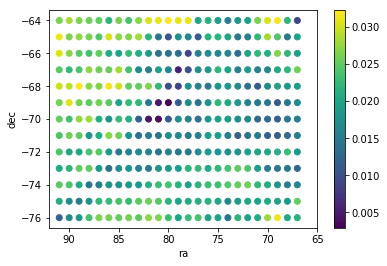

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([92,65])
sc = ax.scatter(acat['ra'],acat['dec'],c=acat['parallax'])
fig.colorbar(sc)

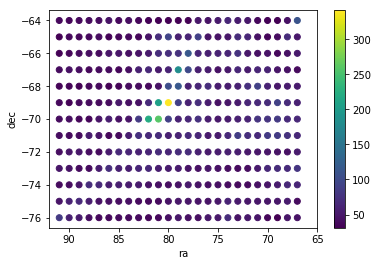

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([92,65])
sc = ax.scatter(acat['ra'],acat['dec'],c=1/acat['parallax'])
fig.colorbar(sc)

In [27]:
maxdist=np.amax(1/acat['parallax'])
print(maxdist)

341.46957381964035


In [29]:
mindist=np.amin(1/acat['parallax'])
print(mindist)

31.041565212687527
